# Setup

Import libraries and test image

In [2]:
from general_utils.processing import letterbox_image_padded, decode_detection_raw
from general_utils.visualization import visualize_detection
from PIL import Image

fpath = './assets/dog.jpg'
input_img = Image.open(fpath)

# YOLOv3 (Darknet53)

Using TensorFlow backend.
/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/khchow/R

/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/khchow/Resear



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<Figure size 432x288 with 0 Axes>

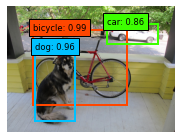

In [3]:
from detectors.yolov3 import YOLOv3_Darknet53
detector = YOLOv3_Darknet53(weights='model_weights/YOLOv3_VOC0712_Darknet53.h5')

x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detection_raw = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
detection_processed = decode_detection_raw(detection_raw, x_meta, detector.classes)

visualize_detection(input_img, detection_processed)

# YOLOv3 (MobileNetV1)

/home/khchow/Research/ObjDetZoo/venv/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


<Figure size 432x288 with 0 Axes>

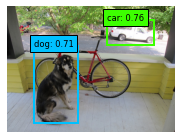

In [4]:
from detectors.yolov3 import YOLOv3_MobileNetV1
detector = YOLOv3_MobileNetV1(weights='model_weights/YOLOv3_VOC0712_MobileNetV1.h5')

x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detection_raw = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
detection_processed = decode_detection_raw(detection_raw, x_meta, detector.classes)

visualize_detection(input_img, detection_processed)

# SSD300 (VGG16)


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<Figure size 432x288 with 0 Axes>

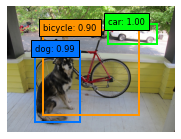

In [5]:
from detectors.ssd import SSD300
detector = SSD300(weights='model_weights/SSD_VOC0712_VGG16_300x300.h5')

x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detection_raw = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
detection_processed = decode_detection_raw(detection_raw, x_meta, detector.classes)

visualize_detection(input_img, detection_processed)

# SSD512 (VGG16)

<Figure size 432x288 with 0 Axes>

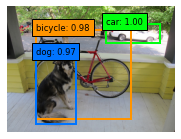

In [6]:
from detectors.ssd import SSD512
detector = SSD512(weights='model_weights/SSD_VOC0712_VGG16_512x512.h5')

x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detection_raw = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
detection_processed = decode_detection_raw(detection_raw, x_meta, detector.classes)

visualize_detection(input_img, detection_processed)

# Faster R-CNN (VGG16)

<Figure size 432x288 with 0 Axes>

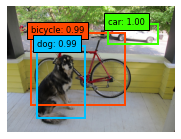

In [3]:
from detectors.frcnn import FRCNN
detector = FRCNN().cuda(device=0).load('model_weights/FRCNN_VOC0712_VGG16.pth')

x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detection_raw = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
detection_processed = decode_detection_raw(detection_raw, x_meta, detector.classes)

visualize_detection(input_img, detection_processed)